<a href="https://colab.research.google.com/github/vikash03042/Rides_Analysis/blob/main/Rides_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("ncr_ride_bookings.csv")


In [4]:
df.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
df.describe().round()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.0,102000.0,10500.0,27000.0,9000.0,102000.0,102000.0,93000.0,93000.0
mean,8.0,29.0,1.0,1.0,1.0,508.0,25.0,4.0,4.0
std,4.0,9.0,0.0,0.0,0.0,396.0,14.0,0.0,0.0
min,2.0,10.0,1.0,1.0,1.0,50.0,1.0,3.0,3.0
25%,5.0,22.0,1.0,1.0,1.0,234.0,12.0,4.0,4.0
50%,8.0,29.0,1.0,1.0,1.0,414.0,24.0,4.0,4.0
75%,11.0,37.0,1.0,1.0,1.0,689.0,37.0,5.0,5.0
max,20.0,45.0,1.0,1.0,1.0,4277.0,50.0,5.0,5.0


In [7]:
df.isnull().sum()/len(df)*100

,0
Date,0.0
Time,0.0
Booking ID,0.0
Booking Status,0.0
Customer ID,0.0
Vehicle Type,0.0
Pickup Location,0.0
Drop Location,0.0
Avg VTAT,7.0
Avg CTAT,32.0


In [8]:
df.shape

(150000, 21)

In [9]:
df.dropna().shape

(0, 21)

In [10]:
df[df.duplicated()].shape

(0, 21)

In [11]:
df[df.duplicated()]

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method


In [12]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [13]:
for col in df.columns:
   if df[col].nunique() < 20:

    print(df[col].value_counts())
    print('-'*50)

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64
--------------------------------------------------
Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64
--------------------------------------------------
Cancelled Rides by Customer
1.0    10500
Name: count, dtype: int64
--------------------------------------------------
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64
--------------------------------------------------
Cancelle

Data Cleaning


In [14]:
df.isnull().sum()/len(df)*100

,0
Date,0.0
Time,0.0
Booking ID,0.0
Booking Status,0.0
Customer ID,0.0
Vehicle Type,0.0
Pickup Location,0.0
Drop Location,0.0
Avg VTAT,7.0
Avg CTAT,32.0


In [15]:
df.head(100)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-10-30,16:29:36,"""CNR3274519""",Cancelled by Driver,"""CID3829804""",eBike,Chhatarpur,Gurgaon Sector 29,6.0,NaN,...,NaN,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2024-08-11,18:21:32,"""CNR3263958""",Completed,"""CID3231090""",Go Sedan,IMT Manesar,Ashram,2.6,36.2,...,NaN,NaN,NaN,NaN,NaN,705.0,40.18,3.9,4.8,UPI
97,2024-05-21,17:39:58,"""CNR5822542""",No Driver Found,"""CID1628370""",Uber XL,Madipur,DLF City Court,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2024-10-08,08:52:57,"""CNR9652983""",Completed,"""CID4773175""",Go Sedan,Azadpur,Khan Market,2.1,35.5,...,NaN,NaN,NaN,NaN,NaN,480.0,20.22,4.3,4.8,Debit Card


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [17]:
med_Col=['Avg VTAT','Avg CTAT','Booking Value','Ride Distance']

medians =df[med_Col].median()

df[med_Col] = df[med_Col].fillna(medians)


In [18]:
df['Avg VTAT'].unique()


array([ 8.3,  4.9, 13.4, 13.1,  5.3,  5.1,  7.1, 12.1,  6.1,  7.7,  4.6,
       12.2, 14. ,  8.5,  5.6,  6. , 12.4, 10.3,  7. , 10.4,  7.9, 13.6,
       11.5,  3.1,  8.9,  9.2,  2. ,  5.4, 14.6,  6.7,  6.6, 10. , 11. ,
        8. , 12.8,  6.4, 11.3,  2.3,  7.8,  8.8,  9.9,  4.1, 11.2,  3. ,
        9.1,  4.3, 11.4,  6.3, 11.7, 16.6,  5.8,  4. ,  3.4, 11.1,  5.9,
        8.1,  5. , 12. ,  3.2,  9.6,  3.9,  8.4, 10.9,  5.7,  8.6,  9.5,
        2.6,  2.1, 14.4,  7.5, 10.8, 14.7,  3.5, 11.9, 12.5, 13.3,  9.7,
        3.6,  9.4,  9. ,  2.4, 19.1,  2.9, 18.5, 16.1, 13.7,  4.5,  6.9,
        6.2,  7.2,  3.7, 11.6,  3.3,  4.7,  7.4,  9.3,  8.2, 13.5,  4.4,
        2.7,  7.3, 10.5,  6.8, 10.7, 12.3,  3.8, 10.2,  9.8,  8.7, 14.2,
        6.5, 12.9,  4.2,  5.2, 16.9,  7.6, 14.9, 11.8, 14.3, 10.1, 12.6,
       14.8, 13.2, 14.5,  4.8, 14.1,  2.5, 15. , 16.2, 12.7,  5.5,  2.8,
       19.2, 18. , 13.9, 13. , 10.6, 20. , 17.6, 15.7,  2.2, 16.5, 15.9,
       19.6, 19.9, 19.8, 16. , 16.4, 13.8, 18.7, 17

In [19]:
df['Avg VTAT'].unique()

array([ 8.3,  4.9, 13.4, 13.1,  5.3,  5.1,  7.1, 12.1,  6.1,  7.7,  4.6,
       12.2, 14. ,  8.5,  5.6,  6. , 12.4, 10.3,  7. , 10.4,  7.9, 13.6,
       11.5,  3.1,  8.9,  9.2,  2. ,  5.4, 14.6,  6.7,  6.6, 10. , 11. ,
        8. , 12.8,  6.4, 11.3,  2.3,  7.8,  8.8,  9.9,  4.1, 11.2,  3. ,
        9.1,  4.3, 11.4,  6.3, 11.7, 16.6,  5.8,  4. ,  3.4, 11.1,  5.9,
        8.1,  5. , 12. ,  3.2,  9.6,  3.9,  8.4, 10.9,  5.7,  8.6,  9.5,
        2.6,  2.1, 14.4,  7.5, 10.8, 14.7,  3.5, 11.9, 12.5, 13.3,  9.7,
        3.6,  9.4,  9. ,  2.4, 19.1,  2.9, 18.5, 16.1, 13.7,  4.5,  6.9,
        6.2,  7.2,  3.7, 11.6,  3.3,  4.7,  7.4,  9.3,  8.2, 13.5,  4.4,
        2.7,  7.3, 10.5,  6.8, 10.7, 12.3,  3.8, 10.2,  9.8,  8.7, 14.2,
        6.5, 12.9,  4.2,  5.2, 16.9,  7.6, 14.9, 11.8, 14.3, 10.1, 12.6,
       14.8, 13.2, 14.5,  4.8, 14.1,  2.5, 15. , 16.2, 12.7,  5.5,  2.8,
       19.2, 18. , 13.9, 13. , 10.6, 20. , 17.6, 15.7,  2.2, 16.5, 15.9,
       19.6, 19.9, 19.8, 16. , 16.4, 13.8, 18.7, 17

In [20]:
rating_col=['Customer Rating','Driver Ratings']
df[rating_col]=df[rating_col].fillna(0.0)

In [21]:
print(df[rating_col])

        Customer Rating  Driver Ratings
0                   0.0             0.0
1                   0.0             0.0
2                   4.9             4.9
3                   5.0             4.6
4                   4.3             4.1
...                 ...             ...
149995              4.1             3.7
149996              5.0             4.8
149997              4.4             3.9
149998              3.7             4.1
149999              4.9             4.6

[150000 rows x 2 columns]


In [22]:
df['Payment Method']= df['Payment Method'].fillna('Unknown')

In [23]:
df.isnull().sum(0/len(df)*100)

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0


Data Standardization and Time-Series Preparation
below we are going to concate date and time together and then we drop the existing Date and Time column.

In [24]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [25]:
df['BookingDateTime']=df['Date']+' '+df['Time']

In [26]:
df['BookingDateTime']=pd.to_datetime(df['BookingDateTime'])

below we do .str.strip to remove leading/trailing space

In [27]:
 df['Booking Status']= df['Booking Status'].str.strip()

In [28]:
df['Status_Group']= np.where(df['Booking Status'] == 'Completed', 'Completed',
                             np.where(df['Booking Status']== 'Cancelled','Cancelled by Customer',
                             np.where(df['Booking Status']== 'No Driver Found','No Driver Found',
                             np.where(df['Booking Status']== 'Incomplete','Incomplete/Other Failure','Other Failure'))))

In [29]:
df.isnull().sum()


,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0


In [30]:
print(df[['BookingDateTime' , 'Status_Group','Booking Status']].head())
print("\nNew DataFrame Info:")
df.info()

      BookingDateTime              Status_Group   Booking Status
0 2024-03-23 12:29:38           No Driver Found  No Driver Found
1 2024-11-29 18:01:39  Incomplete/Other Failure       Incomplete
2 2024-08-23 08:56:10                 Completed        Completed
3 2024-10-21 17:17:25                 Completed        Completed
4 2024-09-16 22:08:00                 Completed        Completed

New DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  object        
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000

Location Cleaning


In [31]:
ncr_regions ={
    'Gurgaon':['Gurgaon','Gurugram','Ggn'],
    'Noida':['Noida','Noida Extension','Greater Noida'],
    'Ghaziabad':['Ghaziabad','GZB'],
    'Faridabad':['Faridabad','FBD'],
    'New Delhi':['Delhi','New Delhi','NDLS','DLI','Shahdara','Dwarka','Karol Bagh','Palam','Janakpuri','Laxmi Nagar','Kalakaji','Vasant Kunj','Saket','Connaught Place','CP'],
    'Other NCR':['Khandsa','Manesar','Meerut','Rewari','Sonepat','Panipat']
}

In [32]:
df['hour']= df['BookingDateTime'].dt.hour
df['day']=df['BookingDateTime'].dt.day_of_week
df['month']=df['BookingDateTime'].dt.month
df['Year']=df['BookingDateTime'].dt.year
df['date']=df['BookingDateTime'].dt.date


In [33]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method',
       'BookingDateTime', 'Status_Group', 'hour', 'day', 'month', 'Year',
       'date'],
      dtype='object')

In [34]:
droper=['Date','Time','Booking Status','Cancelled Rides by Customer','Cancelled Rides by Driver','Incomplete Rides']

df.drop(columns= droper, errors='ignore' , inplace=True)

In [35]:
df['time']=df['BookingDateTime'].dt.time

In [36]:
df.head()

,Booking ID,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,...,Customer Rating,Payment Method,BookingDateTime,Status_Group,hour,day,month,Year,date,time
0,"""CNR5884300""","""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,NaN,NaN,NaN,...,0.0,Unknown,2024-03-23 12:29:38,No Driver Found,12,5,3,2024,2024-03-23,12:29:38
1,"""CNR1326809""","""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,Vehicle Breakdown,...,0.0,UPI,2024-11-29 18:01:39,Incomplete/Other Failure,18,4,11,2024,2024-11-29,18:01:39
2,"""CNR8494506""","""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,...,4.9,Debit Card,2024-08-23 08:56:10,Completed,8,4,8,2024,2024-08-23,08:56:10
3,"""CNR8906825""","""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,...,5.0,UPI,2024-10-21 17:17:25,Completed,17,0,10,2024,2024-10-21,17:17:25
4,"""CNR1950162""","""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,...,4.3,UPI,2024-09-16 22:08:00,Completed,22,0,9,2024,2024-09-16,22:08:00


In [37]:
df['Day_Night']=pd.cut(x=df['hour'] , bins=[0,10,15,18,24] , labels=['Morning','afternoon','Evening','Night'])

In [38]:
df.columns

Index(['Booking ID', 'Customer ID', 'Vehicle Type', 'Pickup Location',
       'Drop Location', 'Avg VTAT', 'Avg CTAT',
       'Reason for cancelling by Customer', 'Driver Cancellation Reason',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method',
       'BookingDateTime', 'Status_Group', 'hour', 'day', 'month', 'Year',
       'date', 'time', 'Day_Night'],
      dtype='object')

Data Visualization


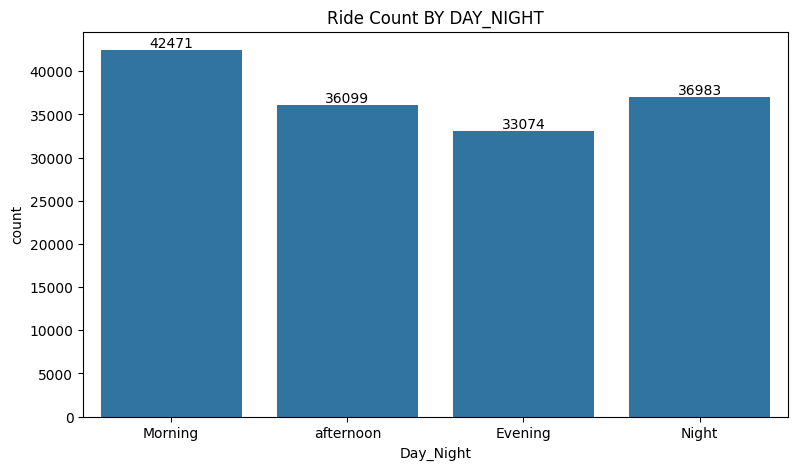

In [39]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

ax=sns.countplot(data=df ,x='Day_Night')
plt.title("Ride Count BY DAY_NIGHT")

for bars in ax.containers:
     ax.bar_label(bars)

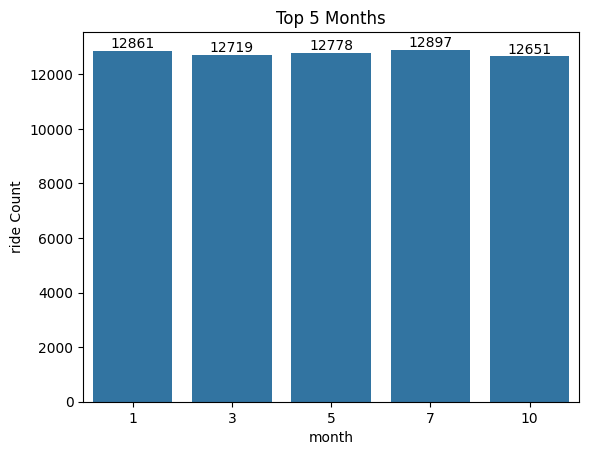

In [40]:
top_5_month=df['month'].value_counts().nlargest(5)

ax= sns.barplot(y=top_5_month.values,x=top_5_month.index)
plt.title('Top 5 Months')
plt.xlabel("month")
plt.ylabel("ride Count")

for bars in ax.containers:
  ax.bar_label(bars)

In [41]:
df.head()

,Booking ID,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,...,Payment Method,BookingDateTime,Status_Group,hour,day,month,Year,date,time,Day_Night
0,"""CNR5884300""","""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,NaN,NaN,NaN,...,Unknown,2024-03-23 12:29:38,No Driver Found,12,5,3,2024,2024-03-23,12:29:38,afternoon
1,"""CNR1326809""","""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,Vehicle Breakdown,...,UPI,2024-11-29 18:01:39,Incomplete/Other Failure,18,4,11,2024,2024-11-29,18:01:39,Evening
2,"""CNR8494506""","""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,...,Debit Card,2024-08-23 08:56:10,Completed,8,4,8,2024,2024-08-23,08:56:10,Morning
3,"""CNR8906825""","""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,...,UPI,2024-10-21 17:17:25,Completed,17,0,10,2024,2024-10-21,17:17:25,Evening
4,"""CNR1950162""","""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,...,UPI,2024-09-16 22:08:00,Completed,22,0,9,2024,2024-09-16,22:08:00,Night


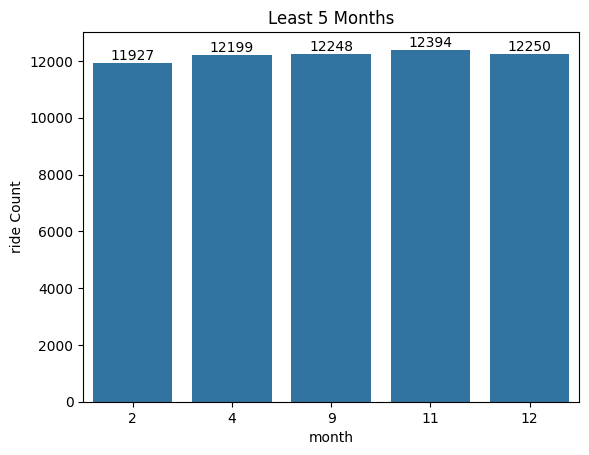

In [42]:
bottom_5_month=df['month'].value_counts().nsmallest(5)

ax= sns.barplot(y=bottom_5_month.values,x=bottom_5_month.index)
plt.title('Least 5 Months')
plt.xlabel("month")
plt.ylabel("ride Count")

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='day', ylabel='count'>

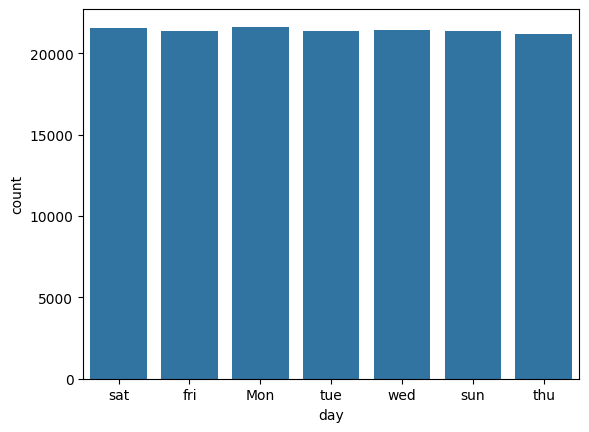

In [43]:
d_label={0:'Mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}

df['day']=df['day'].map(d_label)
sns.countplot(data=df,x='day')

EDA-Exploratory Data Analysis

In [44]:
df.columns

Index(['Booking ID', 'Customer ID', 'Vehicle Type', 'Pickup Location',
       'Drop Location', 'Avg VTAT', 'Avg CTAT',
       'Reason for cancelling by Customer', 'Driver Cancellation Reason',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method',
       'BookingDateTime', 'Status_Group', 'hour', 'day', 'month', 'Year',
       'date', 'time', 'Day_Night'],
      dtype='object')

In [45]:
Status_Counts =df['Status_Group'].value_counts(normalize= True)

In [46]:
fullfillment_funnel =Status_Counts.mul(100).round(2)
print("Ride Fullfillment Funnel distibution")
print(fullfillment_funnel)

Ride Fullfillment Funnel distibution
Status_Group
Completed                   62.0
Other Failure               25.0
No Driver Found              7.0
Incomplete/Other Failure     6.0
Name: proportion, dtype: float64


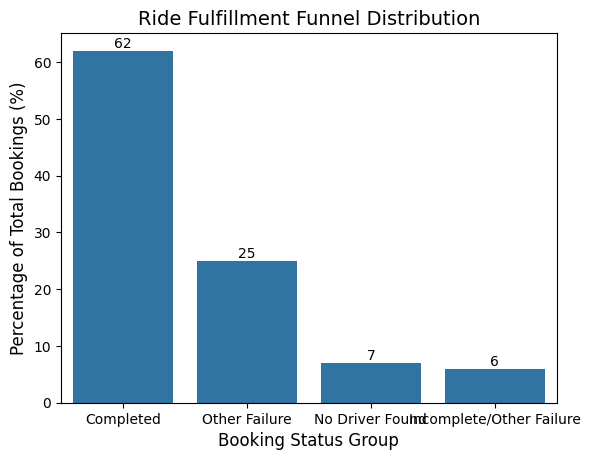

In [47]:
ax=sns.barplot(x=fullfillment_funnel.index,y=fullfillment_funnel.values)
plt.title('Ride Fulfillment Funnel Distribution', fontsize=14)
plt.xlabel('Booking Status Group', fontsize=12)
plt.ylabel('Percentage of Total Bookings (%)', fontsize=12)
for bars in ax.containers:
    ax.bar_label(bars)

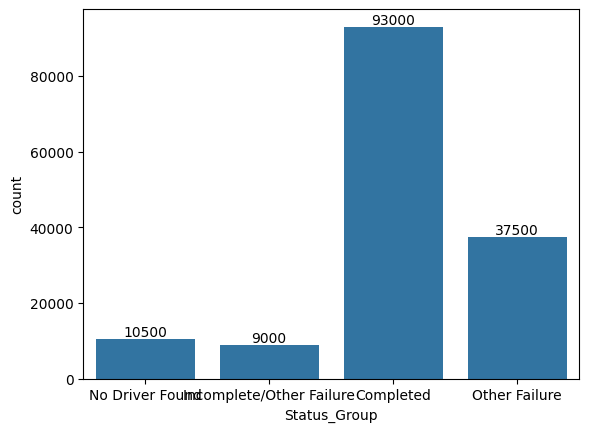

In [48]:
a=sns.countplot(data=df, x='Status_Group')

for bars in a.containers:
    a.bar_label(bars)

In [49]:
Payment_Count =df['Payment Method'].value_counts(normalize= True)
Payment_percentage=Payment_Count.mul(100).round(2)
print("Payment Method Distribution")
print(Payment_percentage)

Payment Method Distribution
Payment Method
Unknown        32.00
UPI            30.61
Cash           16.91
Uber Wallet     8.18
Credit Card     6.81
Debit Card      5.49
Name: proportion, dtype: float64


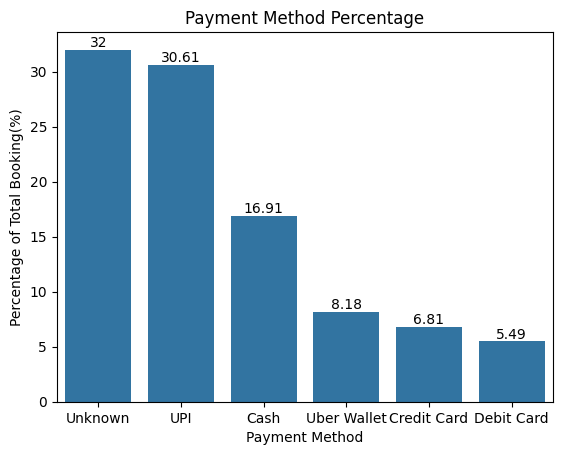

In [50]:
ax=sns.barplot(x= Payment_percentage.index ,y=Payment_percentage.values)
plt.title('Payment Method Percentage')
plt.xlabel('Payment Method')
plt.ylabel('Percentage of Total Booking(%)')
for bars in ax.containers:
    ax.bar_label(bars)

when no driver found

In [51]:
df['hour'].unique()

array([12, 18,  8, 17, 22,  9, 15, 19, 16, 10, 21,  6, 11, 20,  5, 14, 13,
        3,  7,  0,  4,  2,  1, 23], dtype=int32)

In [52]:
no_driver_df=df[df['Status_Group'] == 'No Driver Found']

hourly_shortage=no_driver_df['hour'].value_counts().sort_index()
print(hourly_shortage)
print(hourly_shortage.nlargest(5))

hour
0      93
1     110
2     107
3      99
4      89
5     187
6     308
7     387
8     477
9     588
10    647
11    601
12    529
13    373
14    466
15    547
16    696
17    749
18    891
19    766
20    674
21    553
22    385
23    178
Name: count, dtype: int64
hour
18    891
19    766
17    749
16    696
20    674
Name: count, dtype: int64


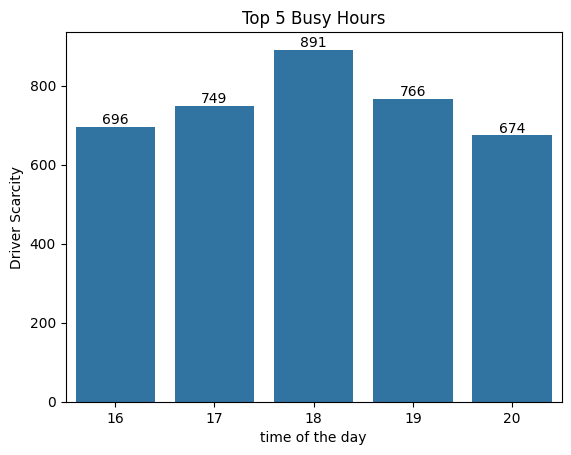

In [53]:
top_5_busy_hrs=hourly_shortage.nlargest(5)

ax= sns.barplot(x=top_5_busy_hrs.index,y=top_5_busy_hrs.values)
plt.title('Top 5 Busy Hours')
plt.xlabel('time of the day')
plt.ylabel('Driver Scarcity')

for bars in ax.containers:
    ax.bar_label(bars)

The final piece of the EDA is to find the reasons behind the biggest failure mode: the $25\%$ cancellation rate. This will tell us if the cancellations are due to customer behavior or driver/platform issues.**bold text**

In [54]:
df.columns

Index(['Booking ID', 'Customer ID', 'Vehicle Type', 'Pickup Location',
       'Drop Location', 'Avg VTAT', 'Avg CTAT',
       'Reason for cancelling by Customer', 'Driver Cancellation Reason',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method',
       'BookingDateTime', 'Status_Group', 'hour', 'day', 'month', 'Year',
       'date', 'time', 'Day_Night'],
      dtype='object')

In [55]:
Cancelled_Rzn_By_Customer=df['Reason for cancelling by Customer'].value_counts().nlargest(5)

In [56]:
Cancelled_Rzn_By_Driver=df['Driver Cancellation Reason'].value_counts().nlargest(5)

In [57]:
print(Cancelled_Rzn_By_Customer)

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64


In [58]:
print(Cancelled_Rzn_By_Driver)

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64
